# __Simple Machine Learning Project: A Walkthrough__
## __Table of Contents__:
### 0.) Dataset Description
### 1.) Data Cleaning
### 2.) Feature Engineering
### 3.) Feature Selection
### 4.) Model Performance

## __Data Description__:
For this walkthrough we'll be using the Concrete Dataset found [here](https://www.kaggle.com/maajdl/yeh-concret-data). We'll be predicting the Compressive Strength of Concrete given its Age and its ingredients. Some Features include:
Water(kg), Cement(kg), Age(days) etc. <blockquote> "Concrete is the most important material in civil engineering. Concrete compressive strength is a highly nonlinear function of age and ingredients.[maajdl](https://www.kaggle.com/maajdl)"</blockquote>
### __Run the cell below to check out the structure of the dataset:__

In [2]:
from exploratoryDataAnalysis import *
_,_,df = loadData()
df.head(10)

,Cement,Slag,Ash,Water,Plasticizer,CoarseAgg,FineAgg,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


## __Data Cleaning__:
Let's have a look at the data! First let's check for any missing values.

In [3]:
df.isna().sum()

Cement                 0
Slag                   0
Ash                    0
Water                  0
Plasticizer            0
CoarseAgg              0
FineAgg                0
Age                    0
CompressiveStrength    0
dtype: int64

Thankfully, there are none. In the wild, our data will almost certainly contain missing values, which we'll either have to impute(replace with estimates) or drop from the data.
Next, we'll look at some useful statistics.

In [4]:
summaryStatistics(df)

(            Cement         Slag  ...          Age  CompressiveStrength
 count  1030.000000  1030.000000  ...  1030.000000          1030.000000
 mean    281.167864    73.895825  ...    45.662136            35.817961
 std     104.506364    86.279342  ...    63.169912            16.705742
 min     102.000000     0.000000  ...     1.000000             2.330000
 25%     192.375000     0.000000  ...     7.000000            23.710000
 50%     272.900000    22.000000  ...    28.000000            34.445000
 75%     350.000000   142.950000  ...    56.000000            46.135000
 max     540.000000   359.400000  ...   365.000000            82.600000
 
 [8 rows x 9 columns],
 Cement                 float64
 Slag                   float64
 Ash                    float64
 Water                  float64
 Plasticizer            float64
 CoarseAgg              float64
 FineAgg                float64
 Age                      int64
 CompressiveStrength    float64
 dtype: object)

We can gleen from the datatypes portion that we are only dealing with numerical data. But the summary statistics are hard to interpret, we'll look at the distribution of our features to enrich our understanding. 

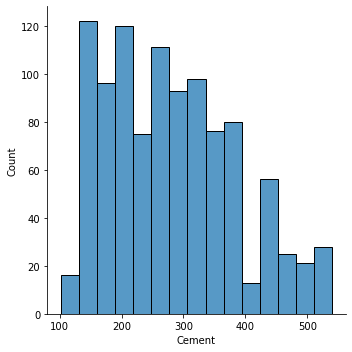

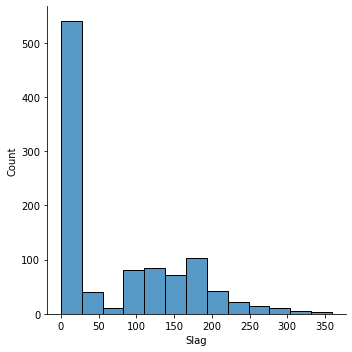

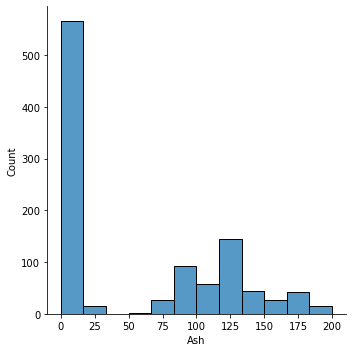

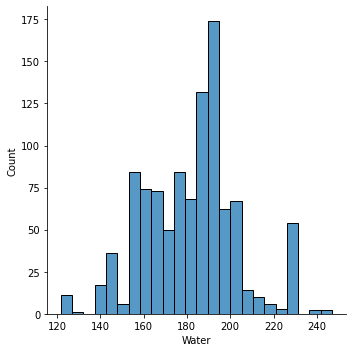

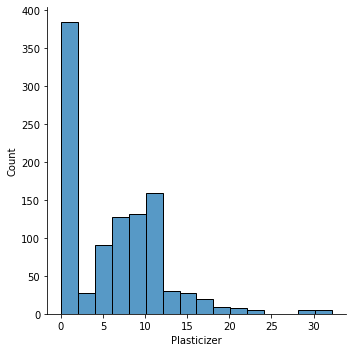

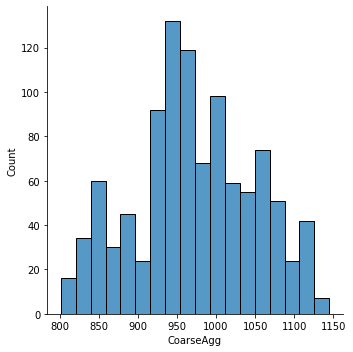

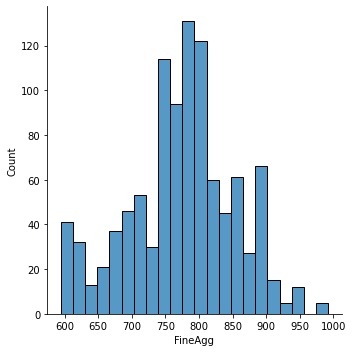

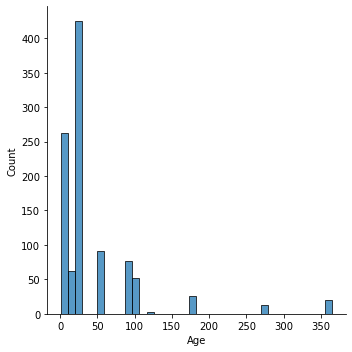

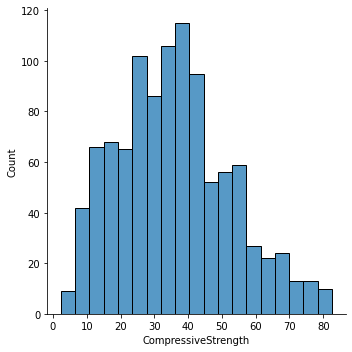

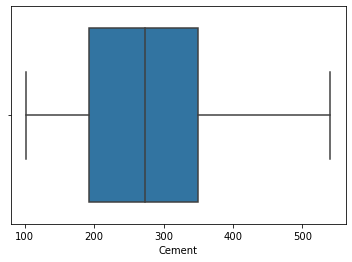

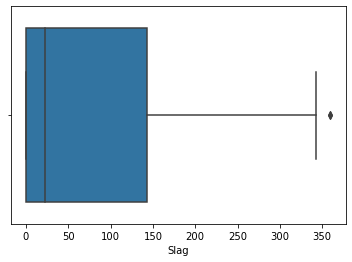

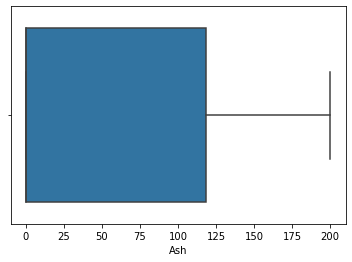

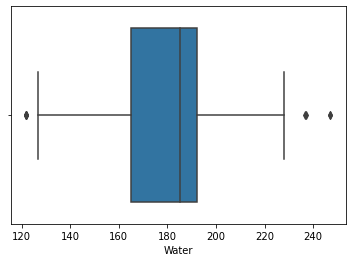

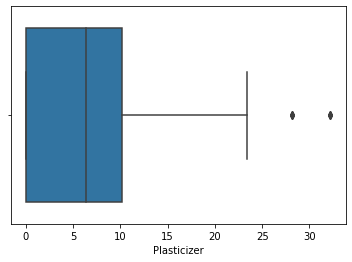

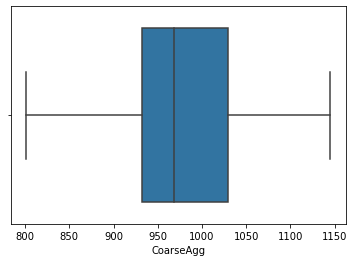

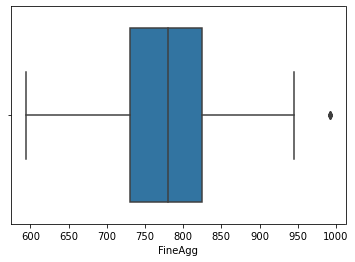

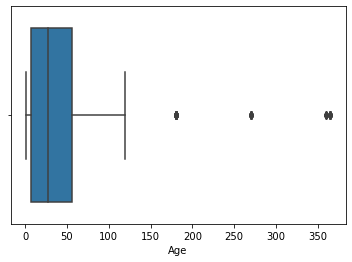

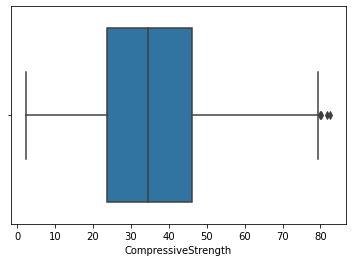

In [5]:
featureDistributions(df)
boxPlots(df)

Cement, Slag, Ash and others look left skewed, and those dots outside of the minimum and maximum lines of the box plots are outliers. The distributions of our features are not Gaussian(normal)-like. The success of many Machine Learning algorithms depends on the features being normally distributed. The method we will use to detect outliers relies on this assumption as well. So we'll go ahead transform our features to make them normally distributed by taking their square root, the log transform is also very popular but doesn't work when features contains 0's.

In [6]:
from featureEngineering import *
df = transformFeatures(df)
df.head(10)

,Cement,Slag,Ash,Water,Plasticizer,CoarseAgg,FineAgg,Age,CompressiveStrength
0,23.237900,0.000000,0.0,12.727922,1.581139,32.249031,26.000000,5.291503,79.99
1,23.237900,0.000000,0.0,12.727922,1.581139,32.480764,26.000000,5.291503,61.89
2,18.234583,11.937336,0.0,15.099669,0.000000,30.528675,24.372115,16.431677,40.27
3,18.234583,11.937336,0.0,15.099669,0.000000,30.528675,24.372115,19.104973,41.05
4,14.092551,11.506520,0.0,13.856406,0.000000,31.279386,28.731516,18.973666,44.30
5,16.309506,10.677078,0.0,15.099669,0.000000,30.528675,25.884358,9.486833,47.03
6,19.493589,9.746794,0.0,15.099669,0.000000,30.528675,24.372115,19.104973,43.70
7,19.493589,9.746794,0.0,15.099669,0.000000,30.528675,24.372115,5.291503,36.45
8,16.309506,10.677078,0.0,15.099669,0.000000,30.528675,25.884358,5.291503,45.85
9,21.794495,0.000000,0.0,15.099669,0.000000,30.528675,24.372115,5.291503,39.29


Now we'll wrap up the data cleaning by removing outliers. We'll do that by taking the Z-score:(x-mean)/standardDeviation of the features. The Z-score will tell us how many standard deviations away our data is from the mean. If it's too far, in our case greater than 2.5, we'll remove it from our dataset.

In [7]:
print(len(df))
_,_,df = findAndRemoveOutliers(df)
print(len(df))

1030
983


As you can see, we've dropped a few rows from our database.
## __Feature Engineering__:
Now that our data is clean, we can begin Feature Engineering (technically, our sqrt transform was feature engineering). In our case, this will only involve feature creation. We will combine our features in interesting ways to create new features. In principle, some of these features would be hard for our ML algorithms to find without a little help.
We will take every product and ratio of every pair of features, and add them to our dataset as new features.


In [8]:
df = featureCreation(df)
print("Here are a few of the features:")
df.columns.tolist()[15:30]

Here are a few of the features:


['Cement/Plasticizer',
 'Cement*Plasticizer',
 'Cement/CoarseAgg',
 'Cement*CoarseAgg',
 'Cement/FineAgg',
 'Cement*FineAgg',
 'Cement/Age',
 'Cement*Age',
 'Slag_Sqrd',
 'Slag/Cement',
 'Slag*Cement',
 'Slag/Ash',
 'Slag*Ash',
 'Slag/Water',
 'Slag*Water']

## __Feature Selection__:
Now that we've helped out our estimators, it's time to whittle down our features to avoid the Curse of Dimensionality.
We'll use an approach called Recursive Feature Elimination(RFE), which helps use choose the features to keep by training a model using a subset of the features,removing the least significant feature(in the case of a linear regression model, the least significant feature will be the one with the smallest coefficient) and repeating until we have the desired number of features.

In [9]:
from featureSelection import *
df = selectFeatures()
df.head(10)

,Cement/FineAgg,Slag*Plasticizer,Water/Cement,Water/Slag,Plasticizer*Cement,Plasticizer*Age,CoarseAgg/Slag,CoarseAgg*FineAgg,CoarseAgg/Age,FineAgg*Water,Age/Cement,Age*Cement,CompressiveStrength
0,0.890341,0.0,0.545376,127.279221,36.742346,8.3666,322.490310,838.474806,5.981455,330.925974,0.226734,122.963409,79.99
1,0.890341,0.0,0.545376,127.279221,36.742346,8.3666,324.807635,844.499852,6.024436,330.925974,0.226734,122.963409,61.89
5,0.627666,0.0,0.920178,1.401091,0.000000,0.0000,2.832741,790.215161,3.184438,390.845238,0.578130,154.725563,47.03
7,0.796563,0.0,0.770643,1.533460,0.000000,0.0000,3.100367,744.048386,5.662369,368.010869,0.270063,103.150376,36.45
8,0.627666,0.0,0.920178,1.401091,0.000000,0.0000,2.832741,790.215161,5.662369,390.845238,0.322466,86.301796,45.85
9,0.890585,0.0,0.689656,150.996689,0.000000,0.0000,305.286750,744.048386,5.662369,368.010869,0.241682,115.325626,39.29
10,0.488790,0.0,0.976315,1.193847,0.000000,0.0000,2.694984,898.704178,3.262744,398.115561,0.668437,133.693680,38.07
11,0.488790,0.0,0.976315,1.193847,0.000000,0.0000,2.694984,898.704178,5.801608,398.115561,0.372837,74.570772,28.02
13,0.530475,0.0,1.087555,1.087555,0.000000,0.0000,2.198831,790.215161,3.184438,390.845238,0.683290,130.766968,42.33
14,0.671004,0.0,0.861087,1.712408,0.000000,0.0000,3.462165,790.215161,5.662369,390.845238,0.301758,92.260501,47.81


It turns out the composite features we created earlier were the most useful!
## __Model Performance__:
Let's run our models now and compare their performance.

In [10]:
from main import *
print("These are our results before feature engineering and selection:")
print("************************************************************")
before = getScores(False)
displayScores(before)
print("************************************************************")
print("These are our results after feature engineering and selection:")
print("************************************************************")
after = getScores(True)
displayScores(after)

These are our results before feature engineering and selection:
************************************************************
SVM:Performance on Test Set
R-Squared:-0.03 MeanAbsoluteError(MAE):7.67 MAE Adjusted(% Error):22
------------------------
KNN:Performance on Test Set
R-Squared:0.52 MeanAbsoluteError(MAE):7.1 MAE Adjusted(% Error):20
------------------------
DecisionTree:Performance on Test Set
R-Squared:0.8 MeanAbsoluteError(MAE):4.79 MAE Adjusted(% Error):13
------------------------
LinearRidge:Performance on Test Set
R-Squared:0.32 MeanAbsoluteError(MAE):8.58 MAE Adjusted(% Error):23
------------------------
************************************************************
These are our results after feature engineering and selection:
************************************************************
SVM:Performance on Test Set
R-Squared:0.75 MeanAbsoluteError(MAE):5.76 MAE Adjusted(% Error):17
------------------------
KNN:Performance on Test Set
R-Squared:0.84 MeanAbsoluteError(MAE):4.6

AS you can see the performance of nearly every model improved significantly once we implemented our feature engineering. Notice, this was extremely general and the techniques we used here were hardly influenced by the type of our data. A more thoughtful approach, combined with some ensemble learning, will certainly yeild better results!